# Première partie

## Informations concernant l'année 2017

### Importation des bibliotheques 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importation des données 

In [2]:
df_ss_nutrition = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\sous_nutrition.csv")
df_population = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\population.csv")
df_dispo_alim = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\dispo_alimentaire.csv")
df_aide_alim = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\aide_alimentaire.csv")

### Analyse des données

* Vérifier que les tables soient bien importées: 

In [3]:
df_ss_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [4]:
df_population

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [5]:
df_dispo_alim

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df_aide_alim

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


* Vérifier le contenu des tables:

In [7]:
df_ss_nutrition.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


In [8]:
df_ss_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [9]:
df_ss_nutrition.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

*Voici la liste des pays ayant des valeurs null:*

In [10]:
df_ss_nutrition.Zone[df_ss_nutrition.isnull().any(axis=1)].unique()

array(['Allemagne', 'Andorre', 'Antigua-et-Barbuda', 'Argentine',
       'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn',
       'Bélarus', 'Belgique', 'Bermudes', 'Bhoutan', 'Bosnie-Herzégovine',
       'Brésil', 'Brunéi Darussalam', 'Burundi', 'Canada',
       'Chine - RAS de Hong-Kong', 'Chine, continentale', 'Comores',
       'Croatie', 'Cuba', 'Danemark', 'Djibouti', 'Érythrée', 'Espagne',
       'Estonie', "États-Unis d'Amérique", 'Fédération de Russie',
       'Finlande', 'France', 'Grèce', 'Grenade', 'Groenland', 'Guinée',
       'Guinée équatoriale', 'Guinée-Bissau', 'Hongrie', 'Îles Cook',
       'Îles Marshall', 'Irlande', 'Islande', 'Israël', 'Italie', 'Japon',
       'Kazakhstan', 'Koweït', 'Lettonie', 'Libye', 'Lituanie',
       'Luxembourg', 'Maldives', 'Malte', 'Micronésie (États fédérés de)',
       'Monténégro', 'Nauru', 'Niger', 'Nioué', 'Norvège',
       'Nouvelle-Zélande', 'Ouganda', 'Palaos', 'Palestine',
       'Papouasie-Nouvelle-Guinée', 'Pays-Bas'

*On remarque que des données importantes ont été perdues. La Somalie ou la Syrie par exemple qui est en guerre seraient surement dans la liste des pays en état de sous-nutrition.*

In [11]:
df_ss_nutrition.duplicated().sum()

0

In [12]:
df_population.describe()

,Année,Valeur
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


In [13]:
df_population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [14]:
df_population.isna().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [15]:
df_population.duplicated().sum()

0

In [16]:
df_dispo_alim.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [17]:
df_dispo_alim.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [18]:
df_dispo_alim.isna().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [19]:
df_dispo_alim.duplicated().sum()

0

In [20]:
df_aide_alim.describe()

,Année,Valeur
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


In [21]:
df_aide_alim.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [22]:
df_aide_alim.isna().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [23]:
df_aide_alim.duplicated().sum()

0

* Nettoyage des donnnées:

In [24]:
df_ss_nutrition.dropna(inplace=True)
df_dispo_alim.fillna(0, inplace=True)

*Pour la table sous_nutrition nous pouvons supprimer les valeurs null sachant que les lignes supprimées ne poseront pas de problèmes.*

*Par contre pour la table dispo_alim il y a trop de valeurs importantes pour supprimer des lignes comportant des valeurs nulles.*

In [25]:
df_ss_nutrition['Année'].replace(['2012-2014','2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],
                              ['2013','2014','2015','2016','2017','2018'],inplace=True)

*Modifions la colonne Année pour avoir une date unique correspondant aux valeurs:*

In [26]:
df_ss_nutrition['Valeur'].replace(['<0.1'],['0'], inplace=True)

*Nous avons modifier ici <0.1 par 0 por avoir une colonne ayant des valeurs de meme types.*

In [27]:
df_ss_nutrition['Valeur']=df_ss_nutrition['Valeur'].astype(float)
df_population['Année']=df_population['Année'].astype(object)
df_aide_alim['Année']=df_aide_alim['Année'].astype(object)

*Nous modifions ici les types de certaines colonnes pour homogénéiser les valeurs et faciliter les calculs qui suivront.*

In [28]:
df_ss_nutrition['Valeur']=df_ss_nutrition['Valeur']*1000
df_ss_nutrition['Valeur']

0        8600.0
1        8800.0
2        8900.0
3        9700.0
4       10500.0
         ...   
1195     8300.0
1196     7600.0
1197     7100.0
1198     6500.0
1199     6100.0
Name: Valeur, Length: 624, dtype: float64

*La valeur à été ici transformer pour avoir une valeur en millier identique à la valeur de la population aussi en millier.*

In [29]:
df_ss_nutrition.rename(columns={'Zone': 'Pays'}, inplace=True)

In [30]:
df_ss_nutrition.rename(columns={'Valeur': 'Valeur_ss_nut'}, inplace=True)

In [31]:
df_population.rename(columns={'Zone': 'Pays'}, inplace=True)

In [32]:
df_population.rename(columns={'Valeur': 'Valeur_pop'}, inplace=True)

In [33]:
df_dispo_alim.rename(columns={'Zone': 'Pays'}, inplace=True)

In [34]:
df_aide_alim.rename(columns={'Pays bénéficiaire': 'Pays'}, inplace=True)

In [35]:
df_aide_alim.rename(columns={'Valeur': 'Valeur_aide_alim'}, inplace=True)

*Nous avons modifier ici le nom des colonnes Zone en Pays, pour simplifier les jointures entre les tables que nous ferons plus tard.
Et nous avons modifier le nom des colonnes Valeur, pour les differencier des autres.*

## Proportion de personnes en état de sous-nutrition

* Selection de la table population pour l'année 2017:

In [36]:
df_population_2017=df_population.loc[df_population['Année']==2017]
df_population_2017

,Pays,Année,Valeur_pop
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [37]:
df_total_population_2017=df_population_2017['Valeur_pop'].sum()*1000
df_total_population_2017

7548134111.000001

*(Nous avons multiplier les resultats par mille car les valeurs sont en milliers.)*

In [38]:
print(f'La population mondiale comptait {round(df_total_population_2017)} personnes en 2017.')

La population mondiale comptait 7548134111 personnes en 2017.


* Selection de la table sous_nutrition pour l'année 2017:

In [39]:
df_ss_nutrition_2017=df_ss_nutrition.loc[df_population['Année']==2017]
df_ss_nutrition_2017

,Pays,Année,Valeur_ss_nut
4,Afghanistan,2017,10500.0
10,Afrique du Sud,2017,3100.0
16,Albanie,2017,100.0
22,Algérie,2017,1300.0
40,Angola,2017,5800.0
...,...,...,...
1156,Turkménistan,2017,200.0
1174,Ukraine,2017,1500.0
1186,Vanuatu,2017,0.0
1192,Venezuela (République bolivarienne du),2017,8000.0


In [40]:
df_total_ss_nutrition_2017=df_ss_nutrition_2017['Valeur_ss_nut'].sum()*1000
df_total_ss_nutrition_2017

535700000.0

*Nous avons calculé la somme de la population de chaque pays après avoir selectionné la population pour l'année 2017.
Et de la meme manière pour le total de la population en sous-nutrition*

In [41]:
print(f'En 2017, on pouvait compter {round(df_total_ss_nutrition_2017)} personnes en état de sous-nutrition.')

En 2017, on pouvait compter 535700000 personnes en état de sous-nutrition.


In [42]:
Prop_ss_nutrition=(df_total_ss_nutrition_2017/df_total_population_2017)*100
print(f'La proportion de personnes en état de sous-nutrition etait de {round(Prop_ss_nutrition,2)}% en 2017')

La proportion de personnes en état de sous-nutrition etait de 7.1% en 2017


* Réprésentation graphique de la différence entre ces données:

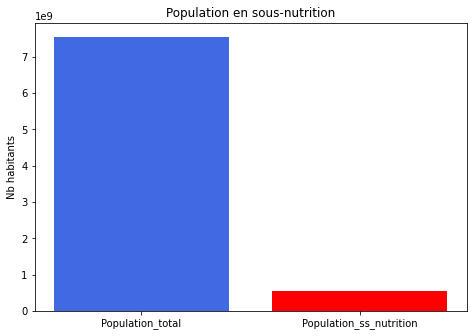

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
catégorie = ['Population_total', 'Population_ss_nutrition']
nb_population = [df_total_population_2017, df_total_ss_nutrition_2017]
ax.bar(catégorie,nb_population)
ax.set_ylabel('Nb habitants')
ax.set_title('Population en sous-nutrition')
plt.bar(catégorie,nb_population, color=['royalblue','red'])
plt.show()

## Le nombre théorique de personnes qui pourraient être nourries.

* Selection de la table dispo_alimentaire avec les colonnes dont nous avons besoin:

In [44]:
df_dispo_alim_Kcal=df_dispo_alim.loc[:,['Pays','Disponibilité alimentaire (Kcal/personne/jour)']]
df_dispo_alim_Kcal

,Pays,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,5.0
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,0.0
4,Afghanistan,4.0
...,...,...
15600,Îles Salomon,45.0
15601,Îles Salomon,11.0
15602,Îles Salomon,0.0
15603,Îles Salomon,0.0


In [45]:
df_dispo_alim_Kcal=df_dispo_alim_Kcal.groupby(['Pays']).sum()
df_dispo_alim_Kcal

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


*Le groupby ici nous aide à avoir la totalité pour chaque pays.*

In [46]:
df_dispo_alim_Kcal=pd.merge(df_dispo_alim_Kcal, df_population_2017 ,how='left', on='Pays')
df_dispo_alim_Kcal

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur_pop
0,Afghanistan,2087.0,2017,36296.113
1,Afrique du Sud,3020.0,2017,57009.756
2,Albanie,3188.0,2017,2884.169
3,Algérie,3293.0,2017,41389.189
4,Allemagne,3503.0,2017,82658.409
...,...,...,...,...
169,Émirats arabes unis,3275.0,2017,9487.203
170,Équateur,2346.0,2017,16785.361
171,États-Unis d'Amérique,3682.0,2017,325084.756
172,Éthiopie,2129.0,2017,106399.924


*La jointure à été faite sur la gauche pour avoir la totalité des données de la table dispo_alimentaire.*

In [47]:
df_dispo_alim_Kcal['Kcal/personne/jour']=df_dispo_alim_Kcal['Valeur_pop']*df_dispo_alim_Kcal['Disponibilité alimentaire (Kcal/personne/jour)']
df_dispo_alim_Kcal

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur_pop,Kcal/personne/jour
0,Afghanistan,2087.0,2017,36296.113,7.574999e+07
1,Afrique du Sud,3020.0,2017,57009.756,1.721695e+08
2,Albanie,3188.0,2017,2884.169,9.194731e+06
3,Algérie,3293.0,2017,41389.189,1.362946e+08
4,Allemagne,3503.0,2017,82658.409,2.895524e+08
...,...,...,...,...,...
169,Émirats arabes unis,3275.0,2017,9487.203,3.107059e+07
170,Équateur,2346.0,2017,16785.361,3.937846e+07
171,États-Unis d'Amérique,3682.0,2017,325084.756,1.196962e+09
172,Éthiopie,2129.0,2017,106399.924,2.265254e+08


*La différence ici entre la colonne Disponibilité alimentaire (Kcal/personne/jour) et Kcal/personne/jour, est que la premiere représente la disponibilité dont dispose le pays et la deuxieme est la valeur calculé de la disponibilité par habitant du pays.*

In [48]:
df_dispo_alim_Kcal_total=df_dispo_alim_Kcal['Kcal/personne/jour'].sum()/2400*1000
df_dispo_alim_Kcal_total

8716243594.72125

*Nous avons alors multiplier par mille le résultat car il etait en millier, puis pour obtenir le nombre d'habitant nous avons divisé le résultat par 2400. Cette valeur représente la moyenne en consommation par personne.
Source: l'Agence nationale de sécurité sanitaire de l'alimentation, de l'environnement et du travail (Anses).*

In [49]:
print(f'Cette meme année, la disponibilité alimentaire mondiale pouvait nourrir {round(df_dispo_alim_Kcal_total)} personnes.')

Cette meme année, la disponibilité alimentaire mondiale pouvait nourrir 8716243595 personnes.


In [50]:
prop_monde=df_dispo_alim_Kcal_total/df_total_population_2017
print(f'Soit {round(prop_monde*100)}% de la population mondiale.')

Soit 115% de la population mondiale.


## Le nombre théorique de personnes qui pourraient être nourries seulement à l'aide de la disponibilité alimentaire des produits végétaux 

* Nous allons procéder de la meme manière que ci-dessus avec pour seul ajout: l'origine végétale.

In [51]:
df_dispo_alim_veg=df_dispo_alim.loc[:,['Pays','Origine','Disponibilité alimentaire (Kcal/personne/jour)']]
df_dispo_alim_veg

,Pays,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,animale,5.0
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
...,...,...,...
15600,Îles Salomon,animale,45.0
15601,Îles Salomon,animale,11.0
15602,Îles Salomon,animale,0.0
15603,Îles Salomon,vegetale,0.0


In [52]:
df_dispo_alim_veg=df_dispo_alim_veg.loc[df_dispo_alim['Origine']=='vegetale']
df_dispo_alim_veg

,Pays,Origine,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
6,Afghanistan,vegetale,0.0
...,...,...,...
15595,Îles Salomon,vegetale,0.0
15596,Îles Salomon,vegetale,0.0
15597,Îles Salomon,vegetale,0.0
15603,Îles Salomon,vegetale,0.0


In [53]:
df_dispo_alim_veg=df_dispo_alim_veg.groupby(['Pays']).sum()
df_dispo_alim_veg

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Afghanistan,1871.0
Afrique du Sud,2533.0
Albanie,2203.0
Algérie,2915.0
Allemagne,2461.0
...,...
Émirats arabes unis,2718.0
Équateur,1732.0
États-Unis d'Amérique,2698.0


In [54]:
df_dispo_alim_veg=pd.merge(df_dispo_alim_veg, df_population_2017, how='left' , on='Pays')
df_dispo_alim_veg

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur_pop
0,Afghanistan,1871.0,2017,36296.113
1,Afrique du Sud,2533.0,2017,57009.756
2,Albanie,2203.0,2017,2884.169
3,Algérie,2915.0,2017,41389.189
4,Allemagne,2461.0,2017,82658.409
...,...,...,...,...
169,Émirats arabes unis,2718.0,2017,9487.203
170,Équateur,1732.0,2017,16785.361
171,États-Unis d'Amérique,2698.0,2017,325084.756
172,Éthiopie,2005.0,2017,106399.924


In [55]:
df_dispo_alim_veg['Kcal/personne/jour']=df_dispo_alim_veg['Valeur_pop']*df_dispo_alim_veg['Disponibilité alimentaire (Kcal/personne/jour)']
df_dispo_alim_veg

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur_pop,Kcal/personne/jour
0,Afghanistan,1871.0,2017,36296.113,6.791003e+07
1,Afrique du Sud,2533.0,2017,57009.756,1.444057e+08
2,Albanie,2203.0,2017,2884.169,6.353824e+06
3,Algérie,2915.0,2017,41389.189,1.206495e+08
4,Allemagne,2461.0,2017,82658.409,2.034223e+08
...,...,...,...,...,...
169,Émirats arabes unis,2718.0,2017,9487.203,2.578622e+07
170,Équateur,1732.0,2017,16785.361,2.907225e+07
171,États-Unis d'Amérique,2698.0,2017,325084.756,8.770787e+08
172,Éthiopie,2005.0,2017,106399.924,2.133318e+08


In [56]:
df_dispo_alim_veg_total=df_dispo_alim_veg['Kcal/personne/jour'].sum()/2400*1000
df_dispo_alim_veg_total

7191985088.125416

In [57]:
print(f"Cette meme année, la disponibilité alimentaire mondiale d'origine végétale pouvait nourrir {round(df_dispo_alim_veg_total)} personnes.")

Cette meme année, la disponibilité alimentaire mondiale d'origine végétale pouvait nourrir 7191985088 personnes.


In [58]:
prop_monde_veg=df_dispo_alim_veg_total/df_total_population_2017
print(f'Soit {round(prop_monde_veg*100)}% de la population mondiale.')

Soit 95% de la population mondiale.


## Utilisation de la disponibilité intérieure.
(Part attribuée à l’alimentation animale / l'alimentation humaine.)

* Selection de la table dispo_alimentaire avec toutes les colonnes concernées par l'utilisation interieure.

In [59]:
df_dispo_alim_int=df_dispo_alim.loc[:,['Pays','Aliments pour animaux','Autres Utilisations','Production','Exportations - Quantité','Importations - Quantité','Disponibilité intérieure','Nourriture', 'Pertes','Semences', 'Traitement','Variation de stock']]
df_dispo_alim_int

,Pays,Aliments pour animaux,Autres Utilisations,Production,Exportations - Quantité,Importations - Quantité,Disponibilité intérieure,Nourriture,Pertes,Semences,Traitement,Variation de stock
0,Afghanistan,0.0,0.0,53.0,0.0,0.0,53.0,53.0,0.0,0.0,0.0,0.0
1,Afghanistan,0.0,0.0,3.0,2.0,40.0,41.0,39.0,2.0,0.0,0.0,0.0
2,Afghanistan,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
3,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,0.0,0.0,0.0,0.0,82.0,82.0,82.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,0.0,0.0,2.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
15601,Îles Salomon,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Nous choisissons ici les colonnes des 10 variables dont nous aurons besoin.*

In [60]:
df_dispo_alim_int=df_dispo_alim_int.groupby(['Pays']).sum()/1000
df_dispo_alim_int

,Aliments pour animaux,Autres Utilisations,Production,Exportations - Quantité,Importations - Quantité,Disponibilité intérieure,Nourriture,Pertes,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,
Afghanistan,0.768,0.415,11.171,0.278,2.988,13.515,10.735,1.135,0.395,0.063,-0.368
Afrique du Sud,5.309,0.876,63.263,11.674,7.517,61.256,29.812,2.193,0.253,22.819,2.153
Albanie,0.660,0.174,3.964,0.094,0.933,4.758,3.476,0.276,0.055,0.113,-0.045
Algérie,4.352,1.707,26.359,0.655,17.403,42.630,31.729,3.753,0.449,0.637,-0.479
Allemagne,30.209,7.711,154.547,57.431,65.353,162.275,79.238,3.781,1.551,39.842,-0.192
...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1.174,2.689,1.192,4.343,15.327,11.850,6.548,0.705,0.003,0.804,-0.327
Équateur,1.200,1.909,24.337,8.002,1.725,18.614,8.574,0.707,0.138,6.200,0.557
États-Unis d'Amérique,148.432,154.699,894.668,163.524,81.887,777.992,320.889,7.162,10.403,141.010,-35.032


*Le resultat est ici divisé par mille, car l’ensemble des 10 variables sont exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure.*

In [61]:
df_dispo_alim_int_total=df_dispo_alim_int.sum()
df_dispo_alim_int_total

Aliments pour animaux        1304.245
Autres Utilisations           865.023
Production                  10009.680
Exportations - Quantité      1352.158
Importations - Quantité      1296.053
Disponibilité intérieure     9848.994
Nourriture                   4876.258
Pertes                        453.698
Semences                      154.681
Traitement                   2204.687
Variation de stock           -104.402
dtype: float64

*Calcul de la somme de chaque donnée.*

In [62]:
df_dispo_alim_prop=df_dispo_alim_int_total/df_dispo_alim_int_total['Disponibilité intérieure']*100
df_dispo_alim_prop

Aliments pour animaux        13.242418
Autres Utilisations           8.782856
Production                  101.631497
Exportations - Quantité      13.728895
Importations - Quantité      13.159242
Disponibilité intérieure    100.000000
Nourriture                   49.510214
Pertes                        4.606542
Semences                      1.570526
Traitement                   22.384895
Variation de stock           -1.060027
dtype: float64

*Proportion de chaque donnée par rapport à la disponibilité interieure.*

In [63]:
df_dispo_alim_columns=df_dispo_alim_int.columns.tolist()
df_dispo_alim_columns

['Aliments pour animaux',
 'Autres Utilisations',
 'Production',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Disponibilité intérieure',
 'Nourriture',
 'Pertes',
 'Semences',
 'Traitement',
 'Variation de stock']

*Création d'une liste pour la tranformer ensuite en index d'une nouvelle table.*

In [64]:
data = {'Total': df_dispo_alim_int_total,
       
        'Proportion': df_dispo_alim_prop }

df_dispo_alim_proportion= pd.DataFrame(data=data, index=df_dispo_alim_columns)
df_dispo_alim_proportion

,Total,Proportion
Aliments pour animaux,1304.245,13.242418
Autres Utilisations,865.023,8.782856
Production,10009.680,101.631497
Exportations - Quantité,1352.158,13.728895
Importations - Quantité,1296.053,13.159242
Disponibilité intérieure,9848.994,100.000000
Nourriture,4876.258,49.510214
Pertes,453.698,4.606542
Semences,154.681,1.570526
Traitement,2204.687,22.384895


*Création d'une table avec deux colonnes (Total et Proportion vu ci-dessus).*

In [65]:
df_dispo_alim_proportion.sort_values(by='Proportion', ascending=True)

,Total,Proportion
Variation de stock,-104.402,-1.060027
Semences,154.681,1.570526
Pertes,453.698,4.606542
Autres Utilisations,865.023,8.782856
Importations - Quantité,1296.053,13.159242
Aliments pour animaux,1304.245,13.242418
Exportations - Quantité,1352.158,13.728895
Traitement,2204.687,22.384895
Nourriture,4876.258,49.510214
Disponibilité intérieure,9848.994,100.000000


*Classement des données par ordre croissant.*

In [66]:
repartition_dispo_alim=df_dispo_alim_proportion.loc[['Semences','Pertes','Autres Utilisations','Aliments pour animaux','Nourriture','Traitement']]
repartition_dispo_alim

,Total,Proportion
Semences,154.681,1.570526
Pertes,453.698,4.606542
Autres Utilisations,865.023,8.782856
Aliments pour animaux,1304.245,13.242418
Nourriture,4876.258,49.510214
Traitement,2204.687,22.384895


* Représentation graphique des données obtenues:

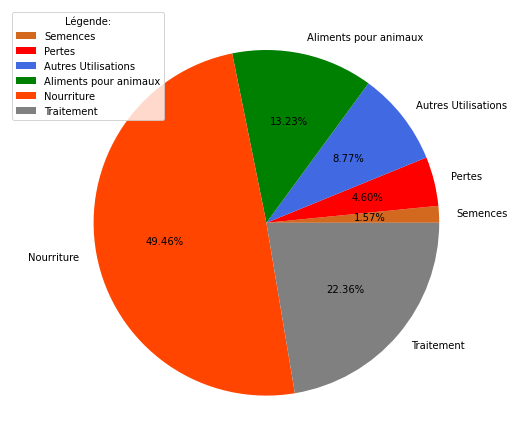

In [130]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.5])
ax.axis('equal')
utilisation = ['Semences','Pertes','Autres Utilisations','Aliments pour animaux','Nourriture','Traitement']
proportion =repartition_dispo_alim['Proportion']
ax.pie(proportion, labels = utilisation,autopct='%1.2f%%', colors=['chocolate','red','royalblue','green','orangered','grey'])
plt.legend(title='Légende:')
plt.show()

In [68]:
df_part_animale=df_dispo_alim_proportion.Total['Aliments pour animaux']
df_part_animale

1304.245

In [69]:
df_part_humain=df_dispo_alim_proportion.Total['Nourriture']
df_part_humain

4876.258000000001

In [70]:
df_pertes=df_dispo_alim_proportion.Proportion['Pertes']
df_pertes

4.606541541197

In [71]:
print(f"Sur l'utilisation de la disponibilité interieure, la part animale représente {round(df_part_animale/df_part_humain*100)}% de la part humaine avec une perte total de {round(df_pertes)}%.")

Sur l'utilisation de la disponibilité interieure, la part animale représente 27% de la part humaine avec une perte total de 5%.


# Deuxième partie

## Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017.

* Pour le calcul de la proportion nous aurons besoin des tables de la population mondiale ainsi que celle de la sous-nutrition:

In [72]:
df_population_2017

,Pays,Année,Valeur_pop
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [73]:
df_ss_nutrition_2017

,Pays,Année,Valeur_ss_nut
4,Afghanistan,2017,10500.0
10,Afrique du Sud,2017,3100.0
16,Albanie,2017,100.0
22,Algérie,2017,1300.0
40,Angola,2017,5800.0
...,...,...,...
1156,Turkménistan,2017,200.0
1174,Ukraine,2017,1500.0
1186,Vanuatu,2017,0.0
1192,Venezuela (République bolivarienne du),2017,8000.0


In [74]:
df_prop_ss_alim_2017=pd.merge(df_ss_nutrition_2017, df_population_2017, how='left' , on='Pays')
df_prop_ss_alim_2017

,Pays,Année_x,Valeur_ss_nut,Année_y,Valeur_pop
0,Afghanistan,2017,10500.0,2017,36296.113
1,Afrique du Sud,2017,3100.0,2017,57009.756
2,Albanie,2017,100.0,2017,2884.169
3,Algérie,2017,1300.0,2017,41389.189
4,Angola,2017,5800.0,2017,29816.766
...,...,...,...,...,...
99,Turkménistan,2017,200.0,2017,5757.667
100,Ukraine,2017,1500.0,2017,44487.709
101,Vanuatu,2017,0.0,2017,285.510
102,Venezuela (République bolivarienne du),2017,8000.0,2017,29402.484


*La jointure se fera ici sur la table sous-nutrition, car ce sont les données auxquelles nous allons nous interesser.*

In [75]:
df_prop_ss_alim_2017['Proportion']=df_prop_ss_alim_2017['Valeur_ss_nut']/df_prop_ss_alim_2017['Valeur_pop']*100
df_prop_ss_alim_2017

,Pays,Année_x,Valeur_ss_nut,Année_y,Valeur_pop,Proportion
0,Afghanistan,2017,10500.0,2017,36296.113,28.928718
1,Afrique du Sud,2017,3100.0,2017,57009.756,5.437666
2,Albanie,2017,100.0,2017,2884.169,3.467203
3,Algérie,2017,1300.0,2017,41389.189,3.140917
4,Angola,2017,5800.0,2017,29816.766,19.452143
...,...,...,...,...,...,...
99,Turkménistan,2017,200.0,2017,5757.667,3.473629
100,Ukraine,2017,1500.0,2017,44487.709,3.371718
101,Vanuatu,2017,0.0,2017,285.510,0.000000
102,Venezuela (République bolivarienne du),2017,8000.0,2017,29402.484,27.208586


In [76]:
df_prop_ss_alim_2017=df_prop_ss_alim_2017.sort_values(by='Proportion', ascending=False)
df_prop_ss_alim_2017

,Pays,Année_x,Valeur_ss_nut,Année_y,Valeur_pop,Proportion
41,Haïti,2017,5300.0,2017,10982.366,48.259182
82,République populaire démocratique de Corée,2017,12000.0,2017,25429.825,47.188685
57,Madagascar,2017,10500.0,2017,25570.512,41.062924
55,Libéria,2017,1800.0,2017,4702.226,38.279742
53,Lesotho,2017,800.0,2017,2091.534,38.249438
...,...,...,...,...,...,...
34,Fidji,2017,0.0,2017,877.459,0.000000
40,Guyana,2017,0.0,2017,775.222,0.000000
43,Îles Salomon,2017,0.0,2017,636.039,0.000000
62,Maurice,2017,0.0,2017,1264.499,0.000000


*Top 10 des pays dont la proportion de personnes sous-alimentées est la plus forte en 2017:*

In [77]:
df_prop_ss_alim_2017_top10=df_prop_ss_alim_2017.head(10)
df_prop_ss_alim_2017_top10

,Pays,Année_x,Valeur_ss_nut,Année_y,Valeur_pop,Proportion
41,Haïti,2017,5300.0,2017,10982.366,48.259182
82,République populaire démocratique de Corée,2017,12000.0,2017,25429.825,47.188685
57,Madagascar,2017,10500.0,2017,25570.512,41.062924
55,Libéria,2017,1800.0,2017,4702.226,38.279742
53,Lesotho,2017,800.0,2017,2091.534,38.249438
94,Tchad,2017,5700.0,2017,15016.753,37.957606
84,Rwanda,2017,4200.0,2017,11980.961,35.055619
66,Mozambique,2017,9400.0,2017,28649.018,32.810898
96,Timor-Leste,2017,400.0,2017,1243.258,32.173531
0,Afghanistan,2017,10500.0,2017,36296.113,28.928718


* Représentation graphique des données:

Text(0.5, 1.0, 'Pays dont la proportion de personnes sous-alimentées est la plus forte en 2017')

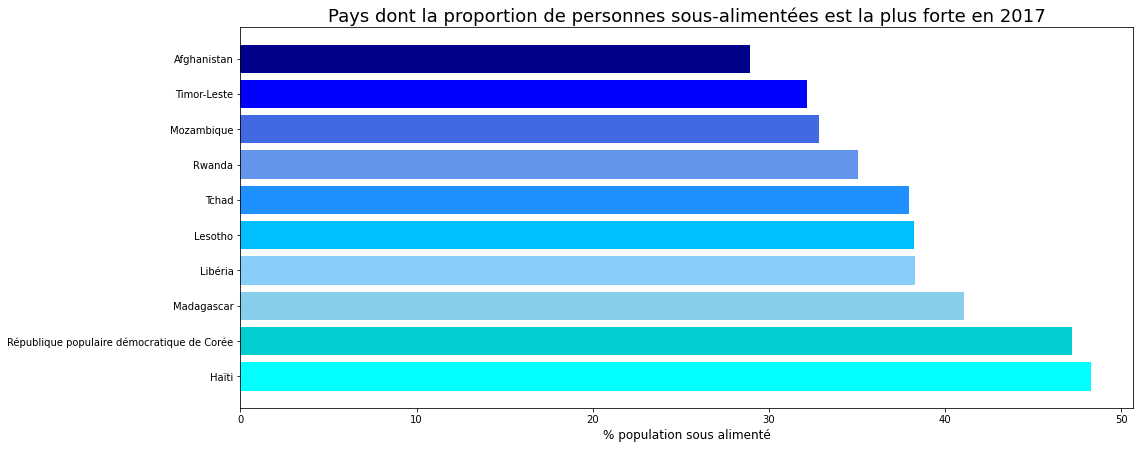

In [78]:
plt.figure(figsize=(16,7))
x = df_prop_ss_alim_2017_top10['Pays']
y = df_prop_ss_alim_2017_top10['Proportion']
plt.barh(x,y, color=['aqua','darkturquoise','skyblue','lightskyblue','deepskyblue','dodgerblue','cornflowerblue','royalblue','blue','darkblue'])
plt.xlabel('% population sous alimenté', fontsize=12)
plt.title('Pays dont la proportion de personnes sous-alimentées est la plus forte en 2017', fontsize=18)

## Pays qui ont le plus bénéficié d’aide depuis 2013.

In [79]:
df_aide_alim

,Pays,Année,Produit,Valeur_aide_alim
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


* Selection des valeurs comprises à partir de l'année 2013:

In [80]:
df_aide_alim_2013=df_aide_alim.loc[df_aide_alim['Année']>=2013]
df_aide_alim_2013

,Pays,Année,Produit,Valeur_aide_alim
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [81]:
df_aide_alim_2013=df_aide_alim_2013.groupby(['Pays']).sum()
df_aide_alim_2013

,Valeur_aide_alim
Pays,
Afghanistan,185452
Algérie,81114
Angola,5014
Bangladesh,348188
Bhoutan,2666
...,...
Zambie,3026
Zimbabwe,62570
Égypte,1122


In [82]:
df_aide_alim_2013=df_aide_alim_2013.sort_values(by='Valeur_aide_alim', ascending=False)
df_aide_alim_2013

,Valeur_aide_alim
Pays,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
...,...
Égypte,1122
Vanuatu,802
Timor-Leste,116


*Top 10 des pays qui ont le plus bénéficié d’aide depuis 2013:*

In [83]:
df_aide_alim_2013_top10=df_aide_alim_2013.head(10)
df_aide_alim_2013_top10

,Valeur_aide_alim
Pays,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


*Nous remarquons ici que certains pays devraient egalement se situé dans la liste des pays en sous-nutrition, mais ils ont été supprimé car il n'y avait aucune valeur les concernant dans le fichier.* 

## Pays ayant le plus de disponibilité/habitant.

*Nous procederons de la meme manière que ci dessus en passant par les memes étapes.*

In [84]:
df_dispo_alim

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df_dispo_alim_plus=df_dispo_alim.loc[:,['Pays','Disponibilité alimentaire (Kcal/personne/jour)']]
df_dispo_alim_plus

,Pays,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,5.0
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,0.0
4,Afghanistan,4.0
...,...,...
15600,Îles Salomon,45.0
15601,Îles Salomon,11.0
15602,Îles Salomon,0.0
15603,Îles Salomon,0.0


In [86]:
df_dispo_alim_plus=df_dispo_alim_plus.groupby(['Pays']).sum()
df_dispo_alim_plus

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


In [87]:
df_dispo_alim_plus=df_dispo_alim_plus.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
df_dispo_alim_plus

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
...,...
Haïti,2089.0
Afghanistan,2087.0
Madagascar,2056.0


*Top 10 des pays ayant le plus de disponibilité/habitant:*

In [88]:
df_dispo_alim_plus_top10=df_dispo_alim_plus.head(10)
df_dispo_alim_plus_top10

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


## Pays ayant le moins de disponibilité/habitant.

*De meme que ci-dessus, nous allons récuperer les memes données pour les afficher par ordre décroissant.*

In [89]:
df_dispo_alim_moins=df_dispo_alim_plus.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
df_dispo_alim_moins

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
...,...
Israël,3610.0
États-Unis d'Amérique,3682.0
Turquie,3708.0


In [90]:
df_dispo_alim_moins_top10=df_dispo_alim_moins.head(10)
df_dispo_alim_moins_top10

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


## Répartition entre l’alimentation humaine et l’alimentation pour animaux en céréales.

*La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le site de la FAO.* 

*Nous avons téléchargé un fichier avec pour variables : les pays, les aliments (pour animaux ou humains), les types de céréales, les années et les valeurs exprimées en tonnes.*

*Procédons comme pour les premiers fichiers par une analyse puis un nettoyage des données:*

In [91]:
df_utilisation_céréales = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\utilisation_céréales.csv")

* Analyse des données:

In [92]:
df_utilisation_céréales

,Zone,?l?ment,Produit,Ann?e,Valeur
0,Afghanistan,Aliments pour animaux,Cer?ales nda,2014,2.0
1,Afghanistan,Aliments pour animaux,Cer?ales nda,2015,6.0
2,Afghanistan,Aliments pour animaux,Cer?ales nda,2017,0.0
3,Afghanistan,Disponibilit? alimentaire en quantit? (tonnes),Cer?ales nda,2014,11.0
4,Afghanistan,Disponibilit? alimentaire en quantit? (tonnes),Cer?ales nda,2015,27.0
...,...,...,...,...,...
6460,Zimbabwe,Disponibilit? alimentaire en quantit? (tonnes),"C?r?ales, pr?parations nda",2015,310.0
6461,Zimbabwe,Disponibilit? alimentaire en quantit? (tonnes),"C?r?ales, pr?parations nda",2016,603.0
6462,Zimbabwe,Disponibilit? alimentaire en quantit? (tonnes),"C?r?ales, pr?parations nda",2017,613.0
6463,Zimbabwe,Disponibilit? alimentaire en quantit? (tonnes),"C?r?ales, pr?parations nda",2018,635.0


In [93]:
df_utilisation_céréales.dtypes

Zone        object
?l?ment     object
Produit     object
Ann?e        int64
Valeur     float64
dtype: object

In [94]:
df_utilisation_céréales.isna().sum()

Zone         0
?l?ment      0
Produit      0
Ann?e        0
Valeur     697
dtype: int64

In [95]:
df_utilisation_céréales.describe()

,Ann?e,Valeur
count,6465.000000,5.768000e+03
mean,2014.581439,1.288430e+04
std,2.817340,1.175602e+05
min,2010.000000,0.000000e+00
25%,2012.000000,2.400000e+01
50%,2015.000000,5.725000e+02
75%,2017.000000,4.581500e+03
max,2019.000000,3.548551e+06


* Nettoyage des données:

In [96]:
df_utilisation_céréales.dropna(inplace=True)

In [97]:
df_utilisation_céréales.rename(columns={'Zone': 'Pays'}, inplace=True)
df_utilisation_céréales.rename(columns={'?l?ment': 'Aliment'}, inplace=True)
df_utilisation_céréales.rename(columns={'Ann?e': 'Année'}, inplace=True)

In [98]:
df_utilisation_céréales['Année']=df_utilisation_céréales['Année'].astype(object)

In [99]:
df_utilisation_céréales['Produit'].unique()

array(['Cer?ales nda', 'C?r?ales pour petit d?jeuner',
       'C?r?ales, pr?parations nda', 'C?r?ales m?lang?es'], dtype=object)

In [100]:
df_utilisation_céréales.replace({'Disponibilit? alimentaire en quantit? (tonnes)': 'Pour humain' , 'Aliments pour animaux': 'Pour animaux'}, inplace=True)

In [101]:
df_utilisation_céréales.replace({'Cer?ales nda': 'Cereales nda', 'C?r?ales pour petit d?jeuner': 'Cereales pour petit dejeuner','C?r?ales, pr?parations nda': 'Cereales, preparations nda','C?r?ales m?lang?es':'Cereales melangees' },inplace=True)

In [102]:
df_utilisation_céréales

,Pays,Aliment,Produit,Année,Valeur
0,Afghanistan,Pour animaux,Cereales nda,2014,2.0
1,Afghanistan,Pour animaux,Cereales nda,2015,6.0
2,Afghanistan,Pour animaux,Cereales nda,2017,0.0
3,Afghanistan,Pour humain,Cereales nda,2014,11.0
4,Afghanistan,Pour humain,Cereales nda,2015,27.0
...,...,...,...,...,...
6460,Zimbabwe,Pour humain,"Cereales, preparations nda",2015,310.0
6461,Zimbabwe,Pour humain,"Cereales, preparations nda",2016,603.0
6462,Zimbabwe,Pour humain,"Cereales, preparations nda",2017,613.0
6463,Zimbabwe,Pour humain,"Cereales, preparations nda",2018,635.0


In [103]:
df_utilisation_céréales.dtypes

Pays        object
Aliment     object
Produit     object
Année        int64
Valeur     float64
dtype: object

In [104]:
df_utilisation_céréales['Année']=df_utilisation_céréales['Année'].astype(object)

* Nous allons selectionner les données pour l'année 2017:

In [105]:
df_utilisation_céréales_2017=df_utilisation_céréales.loc[df_utilisation_céréales['Année']==2017]
df_utilisation_céréales_2017

,Pays,Aliment,Produit,Année,Valeur
2,Afghanistan,Pour animaux,Cereales nda,2017,0.0
5,Afghanistan,Pour humain,Cereales nda,2017,1.0
13,Afghanistan,Pour humain,Cereales pour petit dejeuner,2017,6960.0
19,Afghanistan,Pour animaux,"Cereales, preparations nda",2017,2.0
29,Afghanistan,Pour humain,"Cereales, preparations nda",2017,8.0
...,...,...,...,...,...
6422,Zimbabwe,Pour animaux,Cereales nda,2017,46.0
6432,Zimbabwe,Pour humain,Cereales nda,2017,2119.0
6442,Zimbabwe,Pour humain,Cereales pour petit dejeuner,2017,1632.0
6452,Zimbabwe,Pour animaux,"Cereales, preparations nda",2017,18.0


* Selectionner des données 'Aliment' pour animaux puis pour humains:

In [106]:
df_cereale_animaux=df_utilisation_céréales.loc[df_utilisation_céréales['Aliment']=='Pour animaux']
df_cereale_animaux

,Pays,Aliment,Produit,Année,Valeur
0,Afghanistan,Pour animaux,Cereales nda,2014,2.0
1,Afghanistan,Pour animaux,Cereales nda,2015,6.0
2,Afghanistan,Pour animaux,Cereales nda,2017,0.0
16,Afghanistan,Pour animaux,"Cereales, preparations nda",2014,4.0
17,Afghanistan,Pour animaux,"Cereales, preparations nda",2015,2.0
...,...,...,...,...,...
6450,Zimbabwe,Pour animaux,"Cereales, preparations nda",2015,5.0
6451,Zimbabwe,Pour animaux,"Cereales, preparations nda",2016,25.0
6452,Zimbabwe,Pour animaux,"Cereales, preparations nda",2017,18.0
6453,Zimbabwe,Pour animaux,"Cereales, preparations nda",2018,12.0


In [107]:
df_cereale_animaux=df_cereale_animaux.groupby(['Pays']).sum()
df_cereale_animaux

,Valeur
Pays,
?gypte,327.0
?les Salomon,8.0
?mirats arabes unis,4887.0
?quateur,166.0
?tats-Unis d'Am?rique,592008.0
...,...
Uruguay,445741.0
Venezuela (R?publique bolivarienne du),1667.0
Viet Nam,135.0


In [108]:
df_cereale_animaux.rename(columns={'Valeur': 'Valeur_animaux'}, inplace=True)

In [109]:
df_cereale_humain=df_utilisation_céréales.loc[df_utilisation_céréales['Aliment']=='Pour humain']
df_cereale_humain

,Pays,Aliment,Produit,Année,Valeur
3,Afghanistan,Pour humain,Cereales nda,2014,11.0
4,Afghanistan,Pour humain,Cereales nda,2015,27.0
5,Afghanistan,Pour humain,Cereales nda,2017,1.0
10,Afghanistan,Pour humain,Cereales pour petit dejeuner,2014,3688.0
11,Afghanistan,Pour humain,Cereales pour petit dejeuner,2015,245.0
...,...,...,...,...,...
6460,Zimbabwe,Pour humain,"Cereales, preparations nda",2015,310.0
6461,Zimbabwe,Pour humain,"Cereales, preparations nda",2016,603.0
6462,Zimbabwe,Pour humain,"Cereales, preparations nda",2017,613.0
6463,Zimbabwe,Pour humain,"Cereales, preparations nda",2018,635.0


In [110]:
df_cereale_humain=df_cereale_humain.groupby(['Pays']).sum()
df_cereale_humain

,Valeur
Pays,
?gypte,24272.00
?les Salomon,3468.00
?mirats arabes unis,140235.75
?quateur,51056.00
?tats-Unis d'Am?rique,151171.00
...,...
Venezuela (R?publique bolivarienne du),27210.00
Viet Nam,506184.00
Y?men,16571.00


In [111]:
df_cereale_humain.rename(columns={'Valeur': 'Valeur_humain'}, inplace=True)

*Pour comparer les données entre animaux et humains nous allons créer une jointure entre ces tables.*

In [112]:
df_prop_util_cer_2017=pd.merge(df_cereale_animaux, df_cereale_humain, how='left' , on='Pays')
df_prop_util_cer_2017

,Valeur_animaux,Valeur_humain
Pays,,
?gypte,327.0,24272.00
?les Salomon,8.0,3468.00
?mirats arabes unis,4887.0,140235.75
?quateur,166.0,51056.00
?tats-Unis d'Am?rique,592008.0,151171.00
...,...,...
Uruguay,445741.0,70968.00
Venezuela (R?publique bolivarienne du),1667.0,27210.00
Viet Nam,135.0,506184.00


*La jointure sera ici sur la table des animaux car les calculs suivant se feront en fonction de ceux-ci:*

* Nous allons calculer la proportion entre les quantités de céréales utilisées pour l'alimentation animale et humaine:

In [113]:
df_prop_util_cer_2017['Proportion']=df_cereale_animaux['Valeur_animaux']/df_cereale_humain['Valeur_humain']*100
df_prop_util_cer_2017

,Valeur_animaux,Valeur_humain,Proportion
Pays,,,
?gypte,327.0,24272.00,1.347231
?les Salomon,8.0,3468.00,0.230681
?mirats arabes unis,4887.0,140235.75,3.484846
?quateur,166.0,51056.00,0.325133
?tats-Unis d'Am?rique,592008.0,151171.00,391.614794
...,...,...,...
Uruguay,445741.0,70968.00,628.087307
Venezuela (R?publique bolivarienne du),1667.0,27210.00,6.126424
Viet Nam,135.0,506184.00,0.026670


In [114]:
df_prop_util_cer_2017=df_prop_util_cer_2017.sort_values(by='Proportion', ascending=False)
df_prop_util_cer_2017

,Valeur_animaux,Valeur_humain,Proportion
Pays,,,
Pologne,26461250.0,67859.0,38994.459099
Tchad,354303.0,4346.0,8152.393005
Kazakhstan,2973770.0,95836.0,3102.978004
Tunisie,204742.0,8880.0,2305.653153
Bulgarie,577371.0,29041.0,1988.123687
...,...,...,...
Djibouti,0.0,12141.0,0.000000
Comores,0.0,528.0,0.000000
Belgique,0.0,49223.0,0.000000


* Voici le top 10 des pays dont l'alimentation en céréales des animaux est plus importantes que pour les humains:

In [115]:
df_prop_util_cer_2017_top10=df_prop_util_cer_2017.head(10)
df_prop_util_cer_2017_top10

,Valeur_animaux,Valeur_humain,Proportion
Pays,,,
Pologne,26461250.0,67859.0,38994.459099
Tchad,354303.0,4346.0,8152.393005
Kazakhstan,2973770.0,95836.0,3102.978004
Tunisie,204742.0,8880.0,2305.653153
Bulgarie,577371.0,29041.0,1988.123687
Lituanie,453316.0,29878.0,1517.223375
?thiopie,673508.0,54563.0,1234.367612
Congo,23889.0,2041.0,1170.455659
Turkm?nistan,29328.0,3645.0,804.609053


## Proportion d’exportation du manioc par rapport à la production.

* Selection de la population en sous nutrition de la Thailande pour 2017 :

In [116]:
df_ss_nutrition_thai=df_ss_nutrition_2017.loc[df_ss_nutrition_2017['Pays']=='Thaïlande']
df_ss_nutrition_thai

,Pays,Année,Valeur_ss_nut
1114,Thaïlande,2017,6200.0


In [117]:
total_ss_nutrition_thai=df_ss_nutrition_thai['Valeur_ss_nut'].sum()*1000
total_ss_nutrition_thai

6200000.0

* Selection de la population total de la Thailande pour 2017 :

In [118]:
df_pop_total_thai=df_population_2017.loc[df_population_2017['Pays']=='Thaïlande']
df_pop_total_thai

,Pays,Année,Valeur_pop
1312,Thaïlande,2017,69209.81


In [119]:
total_pop_total_thai=df_pop_total_thai['Valeur_pop'].sum()*1000
total_pop_total_thai                                       

69209810.0

In [120]:
rapport_ss_nutrition_thai=total_ss_nutrition_thai/total_pop_total_thai*100
rapport_ss_nutrition_thai

8.958267621309753

*Nous avons donc 9% de la population total en Thailande qui est en état de sous-nutrition.*

* Affichons maintenant le tableau des disponibilités alimentaires avec les colonnes qui nous interessent:

In [121]:
df_dispo_alim_thai_2017=df_dispo_alim.loc[:,['Pays','Produit','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production','Nourriture']]
df_dispo_alim_thai_2017

,Pays,Produit,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Nourriture
0,Afghanistan,Abats Comestible,53.0,0.0,0.0,53.0,53.0
1,Afghanistan,"Agrumes, Autres",41.0,2.0,40.0,3.0,39.0
2,Afghanistan,Aliments pour enfants,2.0,0.0,2.0,0.0,2.0
3,Afghanistan,Ananas,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,82.0,0.0,82.0,0.0,82.0
...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,3.0,0.0,0.0,2.0,3.0
15601,Îles Salomon,Viande de Volailles,2.0,0.0,2.0,0.0,2.0
15602,Îles Salomon,"Viande, Autre",0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,0.0,0.0,0.0,0.0,0.0


* Selection des valeurs de la disponibilité pour la Thailande en fonction du manioc:

In [122]:
df_prop_export_thai_2017=df_dispo_alim_thai_2017.loc[(df_dispo_alim_thai_2017['Pays']=='Thaïlande') & (df_dispo_alim_thai_2017['Produit']=='Manioc')]
df_prop_export_thai_2017

,Pays,Produit,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Nourriture
13809,Thaïlande,Manioc,6264.0,25214.0,1250.0,30228.0,871.0


* Calculons maintenant le rapport entre la production et l'exportation:

In [123]:
prop_export_thai_2017=df_prop_export_thai_2017['Exportations - Quantité']/df_prop_export_thai_2017['Production']*100
prop_export_thai_2017

13809    83.41273
dtype: float64

*Nous avons ici 83% de la quantité produite qui est exportée.*

*En vue de la quantité exportée, il est possible de diminuer la proportion de personnes en état de sous-nutrition.*

* Essayons donc de voir si une solution est possible:

*Jointure entre la population en sous nutrition et la disponibilité alimentaire:*

In [124]:
df_dispo_alim_thai=pd.merge(df_prop_export_thai_2017, df_ss_nutrition_thai, how='left' , on='Pays')
df_dispo_alim_thai

,Pays,Produit,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Nourriture,Année,Valeur_ss_nut
0,Thaïlande,Manioc,6264.0,25214.0,1250.0,30228.0,871.0,2017,6200.0


* Nous multiplierons les données par mille car toutes sont en milliers:

In [125]:
dispo_alim_thai_nourriture=df_dispo_alim_thai['Nourriture'].sum()*1000
dispo_alim_thai_nourriture

871000.0

In [126]:
ss_nutrition_thai=df_ss_nutrition_thai['Valeur_ss_nut'].sum()*1000
ss_nutrition_thai

6200000.0

In [127]:
rapport_nut_manioc=(dispo_alim_thai_nourriture/ss_nutrition_thai)*1000
rapport_nut_manioc

140.48387096774192

*Nous avons en 2017 une disponibilité en manioc de 140Kg par personne et par an, soit 0.38Kg par jour (140/365).*

*Cette quantité est encore insuffisante pour permettre de ne plus etre en sous nutrition.*

* Si la Thailande n'exportait pas de manioc et que celle ci etait attibuée à la population, observons alors quelle quantité par personne nous pourrons avoir:

In [128]:
dispo_alim_thai_export=df_dispo_alim_thai['Exportations - Quantité'].sum()*1000
dispo_alim_thai_export

25214000.0

In [129]:
rapport_export_manioc=(dispo_alim_thai_export/ss_nutrition_thai)*1000
rapport_export_manioc

4066.774193548387

*Nous aurions pu avoir en 2017 une disponibilité en manioc de 4067Kg par personne et par an, soit 11Kg par jour (4067/365).*

*En observant ces données, nous pouvons donc affirmé qu'il serait possible de ne plus avoir de personne en sous-nutriton en Thailande si le manioc n'etait pas autant exporté.*

*Les thailandais auraient ainsi un stock permettant d'éviter la sous nutrition.*